# Simple EDA: Customer Churn

This notebook gives a quick, clear overview of the customer churn dataset with easy-to-read code and visuals.

In [29]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better visuals
sns.set_theme(style="whitegrid")

In [30]:
# Load the data
# (Update the path if needed)
data_path = Path(r"C:\Users\AHNADXR\Desktop\EDUCATION C\DEPI\project\1\data\raw_data.xlsx")
df = pd.read_excel(data_path)

# Show first 5 rows
df.head()

,Customer.ID,Purchase.Date,Product.Category,Product.Price,Quantity,Total.Purchase.Amount,Payment.Method,Customer.Age,Returns,Customer.Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,Return,John Rivera,31,Female,retained
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,Return,John Rivera,31,Female,retained
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,Return,John Rivera,31,Female,retained
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,No Return,John Rivera,31,Female,retained
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,Return,John Rivera,31,Female,retained


In [31]:
# Quick info: shape, columns, missing values
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nColumns:", df.columns.tolist())
print("\nMissing values:")
print(df.isnull().sum())

Rows: 202611, Columns: 13

Columns: ['Customer.ID', 'Purchase.Date', 'Product.Category', 'Product.Price', 'Quantity', 'Total.Purchase.Amount', 'Payment.Method', 'Customer.Age', 'Returns', 'Customer.Name', 'Age', 'Gender', 'Churn']

Missing values:
Customer.ID              0
Purchase.Date            0
Product.Category         0
Product.Price            0
Quantity                 0
Total.Purchase.Amount    0
Payment.Method           0
Customer.Age             0
Returns                  0
Customer.Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64


C:\Users\AHNADXR\AppData\Local\Temp\ipykernel_10612\2512912060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='Set2')


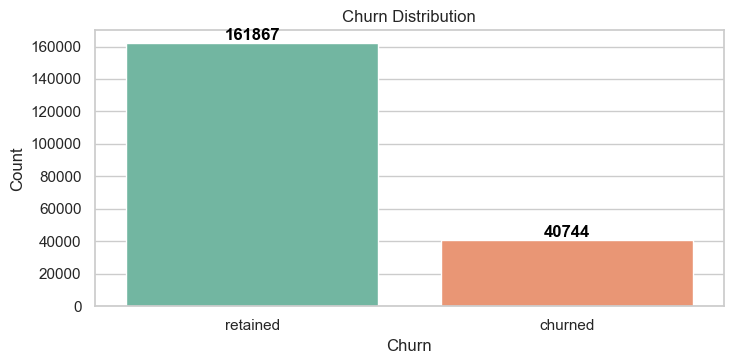

In [43]:
# Churn distribution (target variable)
# Shows if the data is imbalanced
ax = sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

# Add value labels on top of each bar
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()


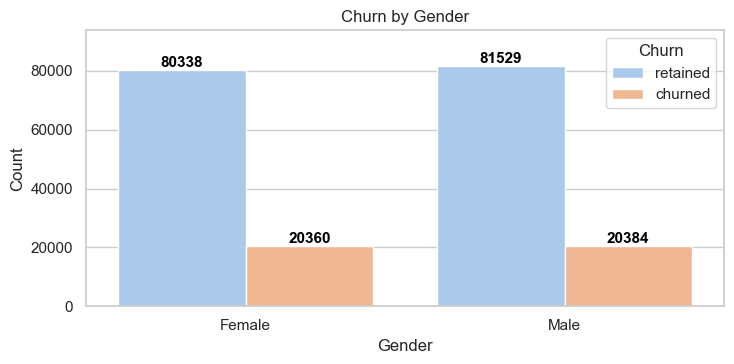

In [37]:
# Churn by Gender
# Easy way to see if gender affects churn
ax = sns.countplot(x='Gender', hue='Churn', data=df, palette='pastel')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add value labels and zoom in
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Focus y-axis on the smaller group
all_counts = [p.get_height() for p in ax.patches if p.get_height() > 0]
if all_counts:
    plt.ylim(0, min(max(all_counts) * 1.15, sum(all_counts) * 0.7))
plt.show()

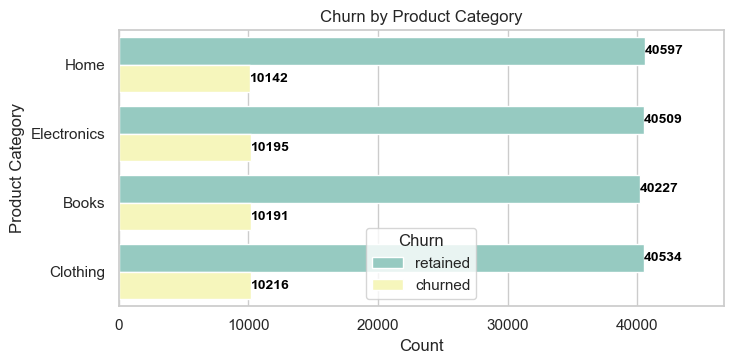

In [38]:
# Churn by Product Category
# See which products have more churners
ax = sns.countplot(y='Product.Category', hue='Churn', data=df, palette='Set3')
plt.title('Churn by Product Category')
plt.xlabel('Count')
plt.ylabel('Product Category')

# Add value labels to each bar
for p in ax.patches:
    width = int(p.get_width())
    if width > 0:
        ax.annotate(f'{width}', (width, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, fontweight='bold', color='black')

# Zoom in to highlight the smallest nonzero bar
all_widths = [p.get_width() for p in ax.patches if p.get_width() > 0]
if all_widths:
    plt.xlim(0, min(max(all_widths) * 1.15, sum(all_widths) * 0.7))
plt.tight_layout()
plt.show()

C:\Users\AHNADXR\AppData\Local\Temp\ipykernel_10612\2166827370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Age', data=df, palette='cool')


C:\Users\AHNADXR\AppData\Local\Temp\ipykernel_10612\2166827370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Age', data=df, palette='cool')


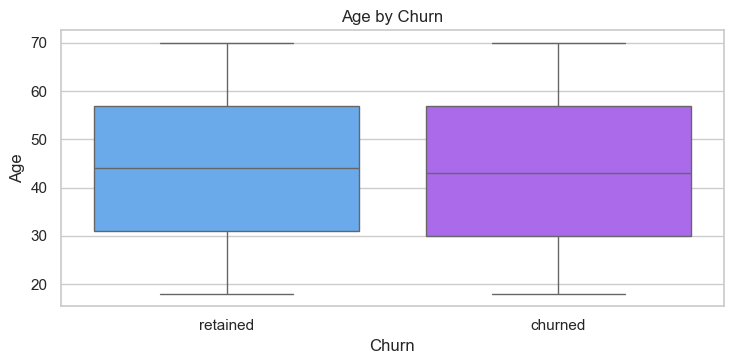

In [35]:
# Numeric feature: Age vs Churn
# Simple boxplot to see if age differs for churners
if 'Age' in df.columns:
    sns.boxplot(x='Churn', y='Age', data=df, palette='cool')
    plt.title('Age by Churn')
    plt.show()

---
## TL;DR Insights

- **Churn is imbalanced**: Most customers do not churn.
- **Gender & Product matter**: Some groups/categories have higher churn.
- **Age may differ**: Churners might be younger/older (see boxplot).
- **Next step**: Balance the data and try simple models.

*Keep it simple: focus on the biggest differences you see in the plots above.*